In [27]:
import tensorflow as tf
import tensorflow.keras.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = tf.convert_to_tensor(x_train, dtype = tf.float32) / 255
y_train = tf.one_hot(tf.convert_to_tensor(y_train, dtype = tf.int32), depth = 10)
x_test = tf.convert_to_tensor(x_test, dtype = tf.float32) / 255

x_train = tf.reshape(x_train, (-1, 28*28))
x_test = tf.reshape(x_test, (-1, 28*28))

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(200)

In [28]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

In [29]:
epochs = 20
lr = 0.1
losses = []

for epoch in range(epochs):
    for (x, y) in train_dataset:
        with tf.GradientTape() as tape:
            # [b, 784]@[784, 256] + [256] => [b, 256]
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            # [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # [b, 128] => [b, 10]
            out = h2 @ w3 + b3
            # mse = mean(sum(y-out)^2)
            loss = tf.reduce_mean(tf.square(y - out))
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])

    losses.append(loss.numpy()) 

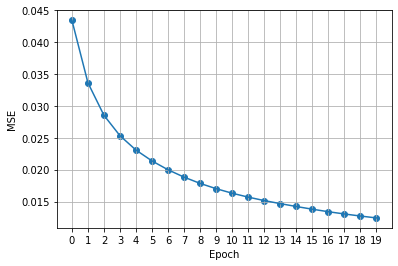

In [30]:
x = np.arange(epochs).astype(dtype=np.str)
plt.plot(x, losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.scatter(x, losses)
plt.grid()
plt.show()

In [31]:
h1 = x_test @ w1 + b1
h1 = tf.nn.relu(h1)
h2 = h1 @ w2 + b2
h2 = tf.nn.relu(h2)
out = h2 @ w3 + b3
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(out, axis=1), y_test), tf.float32))
print(accuracy.numpy())

0.9372
